In [1]:
import pandas as pd
import numpy as np
from functools import reduce
import math
import sys
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./datasets/dataset_train.csv')

In [3]:
df.head()

Index Hogwarts House First Name  Last Name    Birthday Best Hand  \
0      0      Ravenclaw     Tamara        Hsu  2000-03-30      Left   
1      1      Slytherin      Erich    Paredes  1999-10-14     Right   
2      2      Ravenclaw   Stephany      Braun  1999-11-03      Left   
3      3     Gryffindor      Vesta  Mcmichael  2000-08-19      Left   
4      4     Gryffindor     Gaston      Gibbs  1998-09-27      Left   

   Arithmancy   Astronomy  Herbology  Defense Against the Dark Arts  \
0     58384.0 -487.886086   5.727180                       4.878861   
1     67239.0 -552.060507  -5.987446                       5.520605   
2     23702.0 -366.076117   7.725017                       3.660761   
3     32667.0  697.742809  -6.497214                      -6.977428   
4     60158.0  436.775204  -7.820623                            NaN   

   Divination  Muggle Studies  Ancient Runes  History of Magic  \
0       4.722      272.035831     532.484226          5.231058   
1      -5.612     -487.340557     367.760303          4.107170   
2       6.140      664.893521     602.585284          3.555579   
3       4.026     -537.001128     523.982133         -4.809637   
4       2.236     -444.262537     599.324514         -3.444377   

   Transfiguration   Potions  Care of Magical Creatures     Charms  Flying  
0      1039.788281  3.790369                   0.715939 -232.79405  -26.89  
1      1058.944592  7.248742                   0.091674 -252.18425 -113.45  
2      1088.088348  8.728531                  -0.515327 -227.34265   30.42  
3       920.391449  0.821911                  -0.014040 -256.84675  200.64  
4       937.434724  4.311066                  -0.264070 -256.38730  157.98

### V.1 Data Analysis

In [5]:
df_types = df.select_dtypes(include=['float64', 'int64'])

In [6]:
names = df_types.keys()

In [7]:
names

Index(['Index', 'Arithmancy', 'Astronomy', 'Herbology',
       'Defense Against the Dark Arts', 'Divination', 'Muggle Studies',
       'Ancient Runes', 'History of Magic', 'Transfiguration', 'Potions',
       'Care of Magical Creatures', 'Charms', 'Flying'],
      dtype='object')

In [8]:
def stat(arr):   
    def percentile(array, percent):
        k = (len(array) - 1) * percent
        f = math.floor(k)
        c = math.ceil(k)
        if f == c:
            return array[int(k)]
        d0 = array[int(f)] * (c - k)
        d1 = array[int(c)] * (k - f)
        return d0 + d1
        
    count = 0
    mini = float('inf')
    maxi = -float('inf')
    mean = 0
    values = []
    for x in arr:
        if(not np.isnan(x)):
            count += 1
            mean += x
            values.append(x)
        if(maxi < x):
            maxi = x
        if(mini > x):
            mini = x
    if(count == 0):
        return [0, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]
    mean /= count
    
    std = 0
    for x in values:
        std += (x - mean) ** 2
    std = (std / (count - 1)) ** 0.5
    values = sorted(values)
    per_25 = percentile(values, 0.25)
    per_50 = percentile(values, 0.5)
    per_75 = percentile(values, 0.75)
    dic = dict()
    return [count, mean, std, mini, per_25, per_50, per_75, maxi]

### V.2.1 Histogram

In [11]:
targert_col = 'Hogwarts House'

In [12]:
df.dropna(inplace=True)

In [13]:
Y = df[targert_col]

In [31]:
df_number = df.select_dtypes(include=['float64', 'int64'])
df_normal = (df_number - df_number.mean()) / df_number.std()
df_normal.describe()

Index    Arithmancy     Astronomy     Herbology  \
count  1.251000e+03  1.251000e+03  1.251000e+03  1.251000e+03   
mean   9.087677e-17 -4.827828e-17  1.135960e-17  4.259849e-17   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -1.723852e+00 -4.420134e+00 -1.944956e+00 -2.198893e+00   
25%   -8.673515e-01 -6.749737e-01 -1.020834e+00 -1.041848e+00   
50%    4.308727e-03 -3.952384e-02  4.330490e-01  4.474265e-01   
75%    8.662237e-01  6.790620e-01  9.249894e-01  8.183362e-01   
max    1.738967e+00  3.323217e+00  1.861489e+00  1.743646e+00   

       Defense Against the Dark Arts    Divination  Muggle Studies  \
count                   1.251000e+03  1.251000e+03    1.251000e+03   
mean                   -2.839899e-18 -1.192758e-16   -2.271919e-17   
std                     1.000000e+00  1.000000e+00    1.000000e+00   
min                    -1.861489e+00 -2.904611e+00   -1.692952e+00   
25%                    -9.249894e-01 -2.270268e-02   -7.238675e-01   
50%                    -4.330490e-01  3.422944e-01   -4.046729e-01   
75%                     1.020834e+00  6.113293e-01    1.004252e+00   
max                     1.944956e+00  1.658522e+00    2.712022e+00   

       Ancient Runes  History of Magic  Transfiguration       Potions  \
count   1.251000e+03      1.251000e+03     1.251000e+03  1.251000e+03   
mean   -2.314518e-16      4.401843e-17    -1.713879e-15 -8.519697e-18   
std     1.000000e+00      1.000000e+00     1.000000e+00  1.000000e+00   
min    -1.990260e+00     -2.559974e+00    -2.801898e+00 -3.088073e+00   
25%    -9.356281e-01     -1.677520e-01    -9.599011e-02 -7.338635e-01   
50%    -2.991629e-01      3.195085e-01     3.550879e-01 -2.988755e-02   
75%     9.489722e-01      6.540943e-01     6.471708e-01  7.236387e-01   
max     2.334770e+00      1.999370e+00     1.468702e+00  2.441407e+00   

       Care of Magical Creatures        Charms        Flying  
count               1.251000e+03  1.251000e+03  1.251000e+03  
mean               -1.987929e-17 -2.726303e-15  4.259849e-18  
std                 1.000000e+00  1.000000e+00  1.000000e+00  
min                -3.340742e+00 -2.016198e+00 -2.092772e+00  
25%                -6.478488e-01 -8.259201e-01 -6.464528e-01  
50%                -8.228137e-04 -1.664801e-01 -2.560381e-01  
75%                 6.579105e-01  1.228373e+00  3.019384e-01  
max                 3.208629e+00  2.036036e+00  2.618392e+00

In [32]:
target_cls = list(set(Y))
name_courses = list(df_normal.keys())
name_courses.remove('Index')
size_plot = round((len(name_courses)) ** 0.5)
df_normal[targert_col] = Y

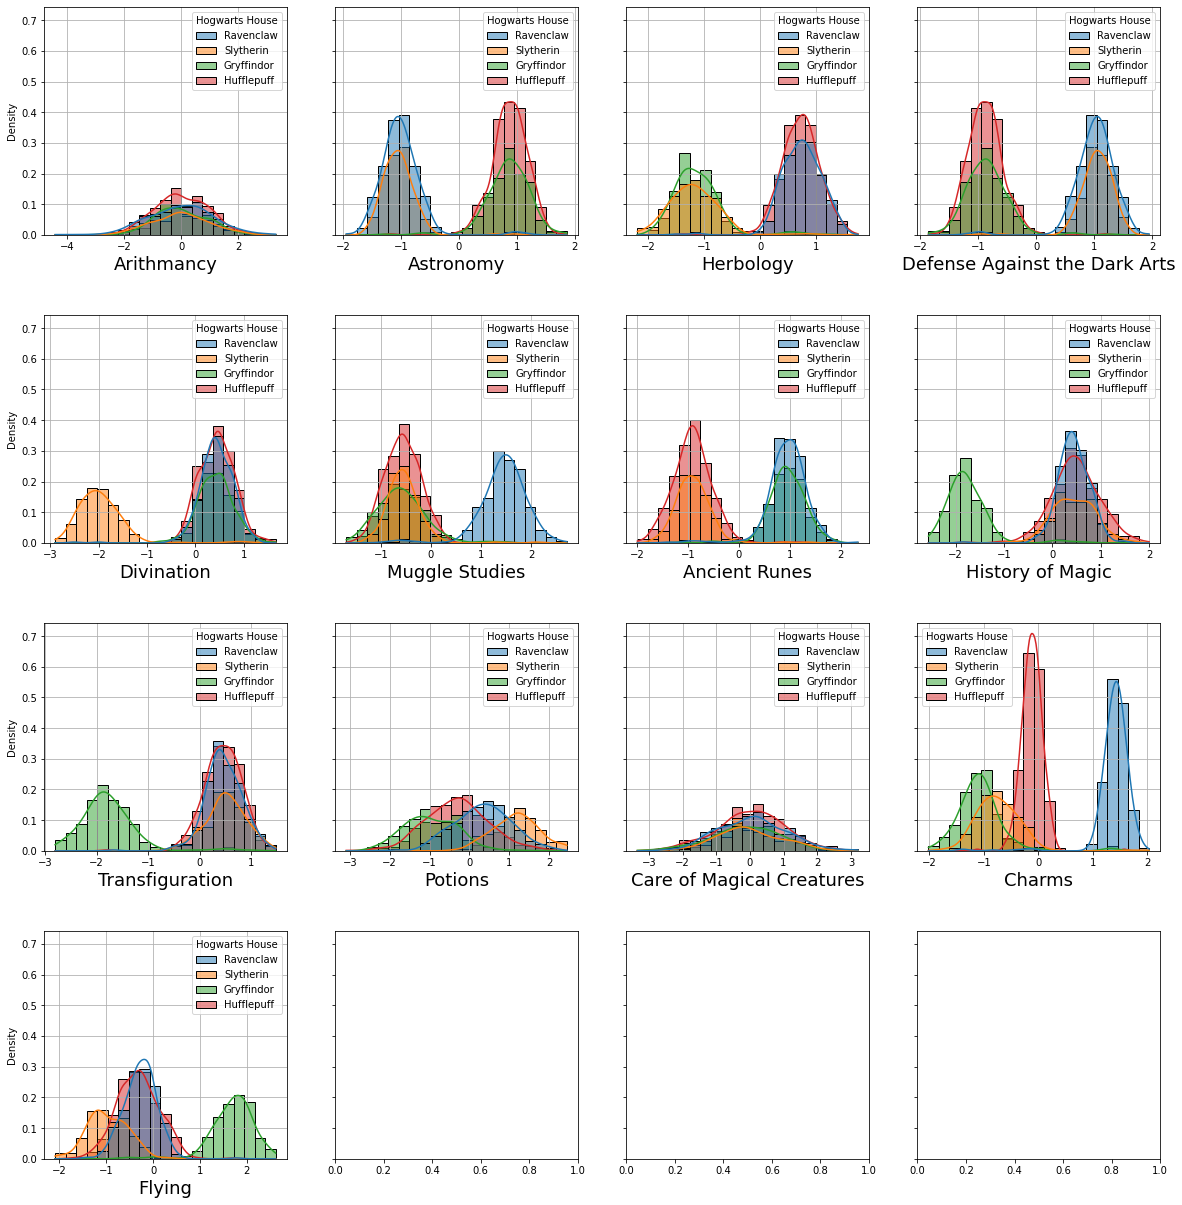

In [23]:
fig, axes = plt.subplots(nrows=size_plot, ncols=size_plot, figsize=(20, 20), sharey=True)
plots = axes.flatten()
i = 0
for name in name_courses: 
    if(name != targert_col):
        sns.histplot(ax=plots[i], data=df_normal, x=name, hue=targert_col, kde=True, common_norm=True, stat="density", bins=21)
        plots[i].set_xlabel(name, fontsize=18)
        plots[i].grid()
        i += 1
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)

In [24]:
norm_course = 'Care of Magical Creatures'

<AxesSubplot:xlabel='Care of Magical Creatures', ylabel='Density'>

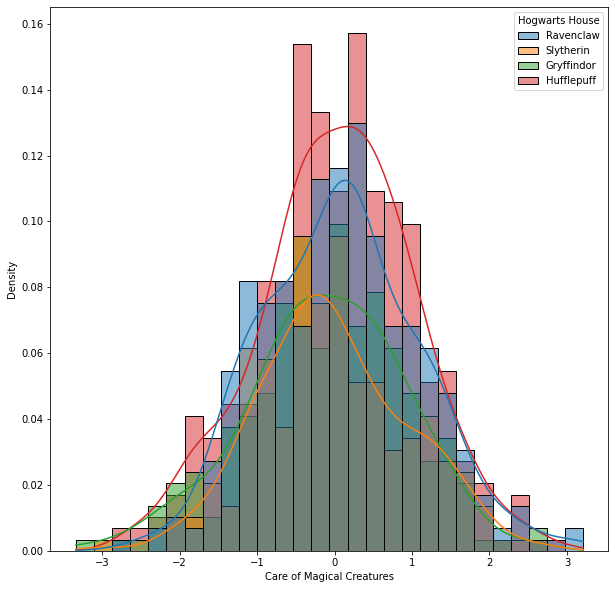

In [25]:
fig = plt.figure(figsize=(10, 10))
sns.histplot(data=df_normal, x=norm_course, hue=targert_col, kde=True, common_norm=True, stat="density")

### V.2.2 Scatter plot

In [26]:
df.keys()

Index(['Index', 'Hogwarts House', 'First Name', 'Last Name', 'Birthday',
       'Best Hand', 'Arithmancy', 'Astronomy', 'Herbology',
       'Defense Against the Dark Arts', 'Divination', 'Muggle Studies',
       'Ancient Runes', 'History of Magic', 'Transfiguration', 'Potions',
       'Care of Magical Creatures', 'Charms', 'Flying'],
      dtype='object')

In [27]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

<AxesSubplot:>

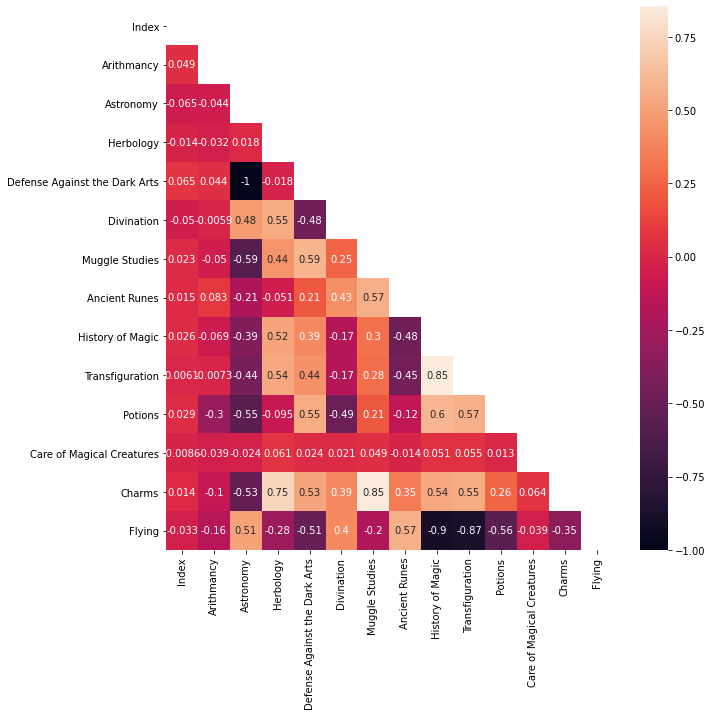

In [28]:
fig = plt.figure(figsize=(10, 10))
sns.heatmap(corr, mask=mask, annot=True)

<AxesSubplot:xlabel='Astronomy', ylabel='Defense Against the Dark Arts'>

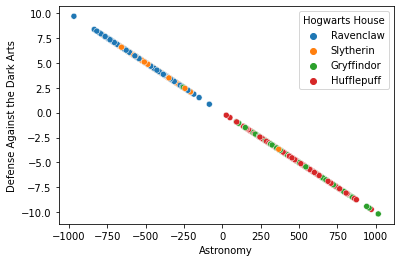

In [29]:
feat1 = 'Astronomy'
feat2 = 'Defense Against the Dark Arts'
target_col = 'Hogwarts House'
sns.scatterplot(data=df, x=feat1, y=feat2, hue=target_col)

### V.2.3 Pair plot

In [ ]:
feat = ['Arithmancy', 'Index', 'Astronomy', 'Potions', 'Care of Magical Creatures']

<Figure size 720x720 with 0 Axes>

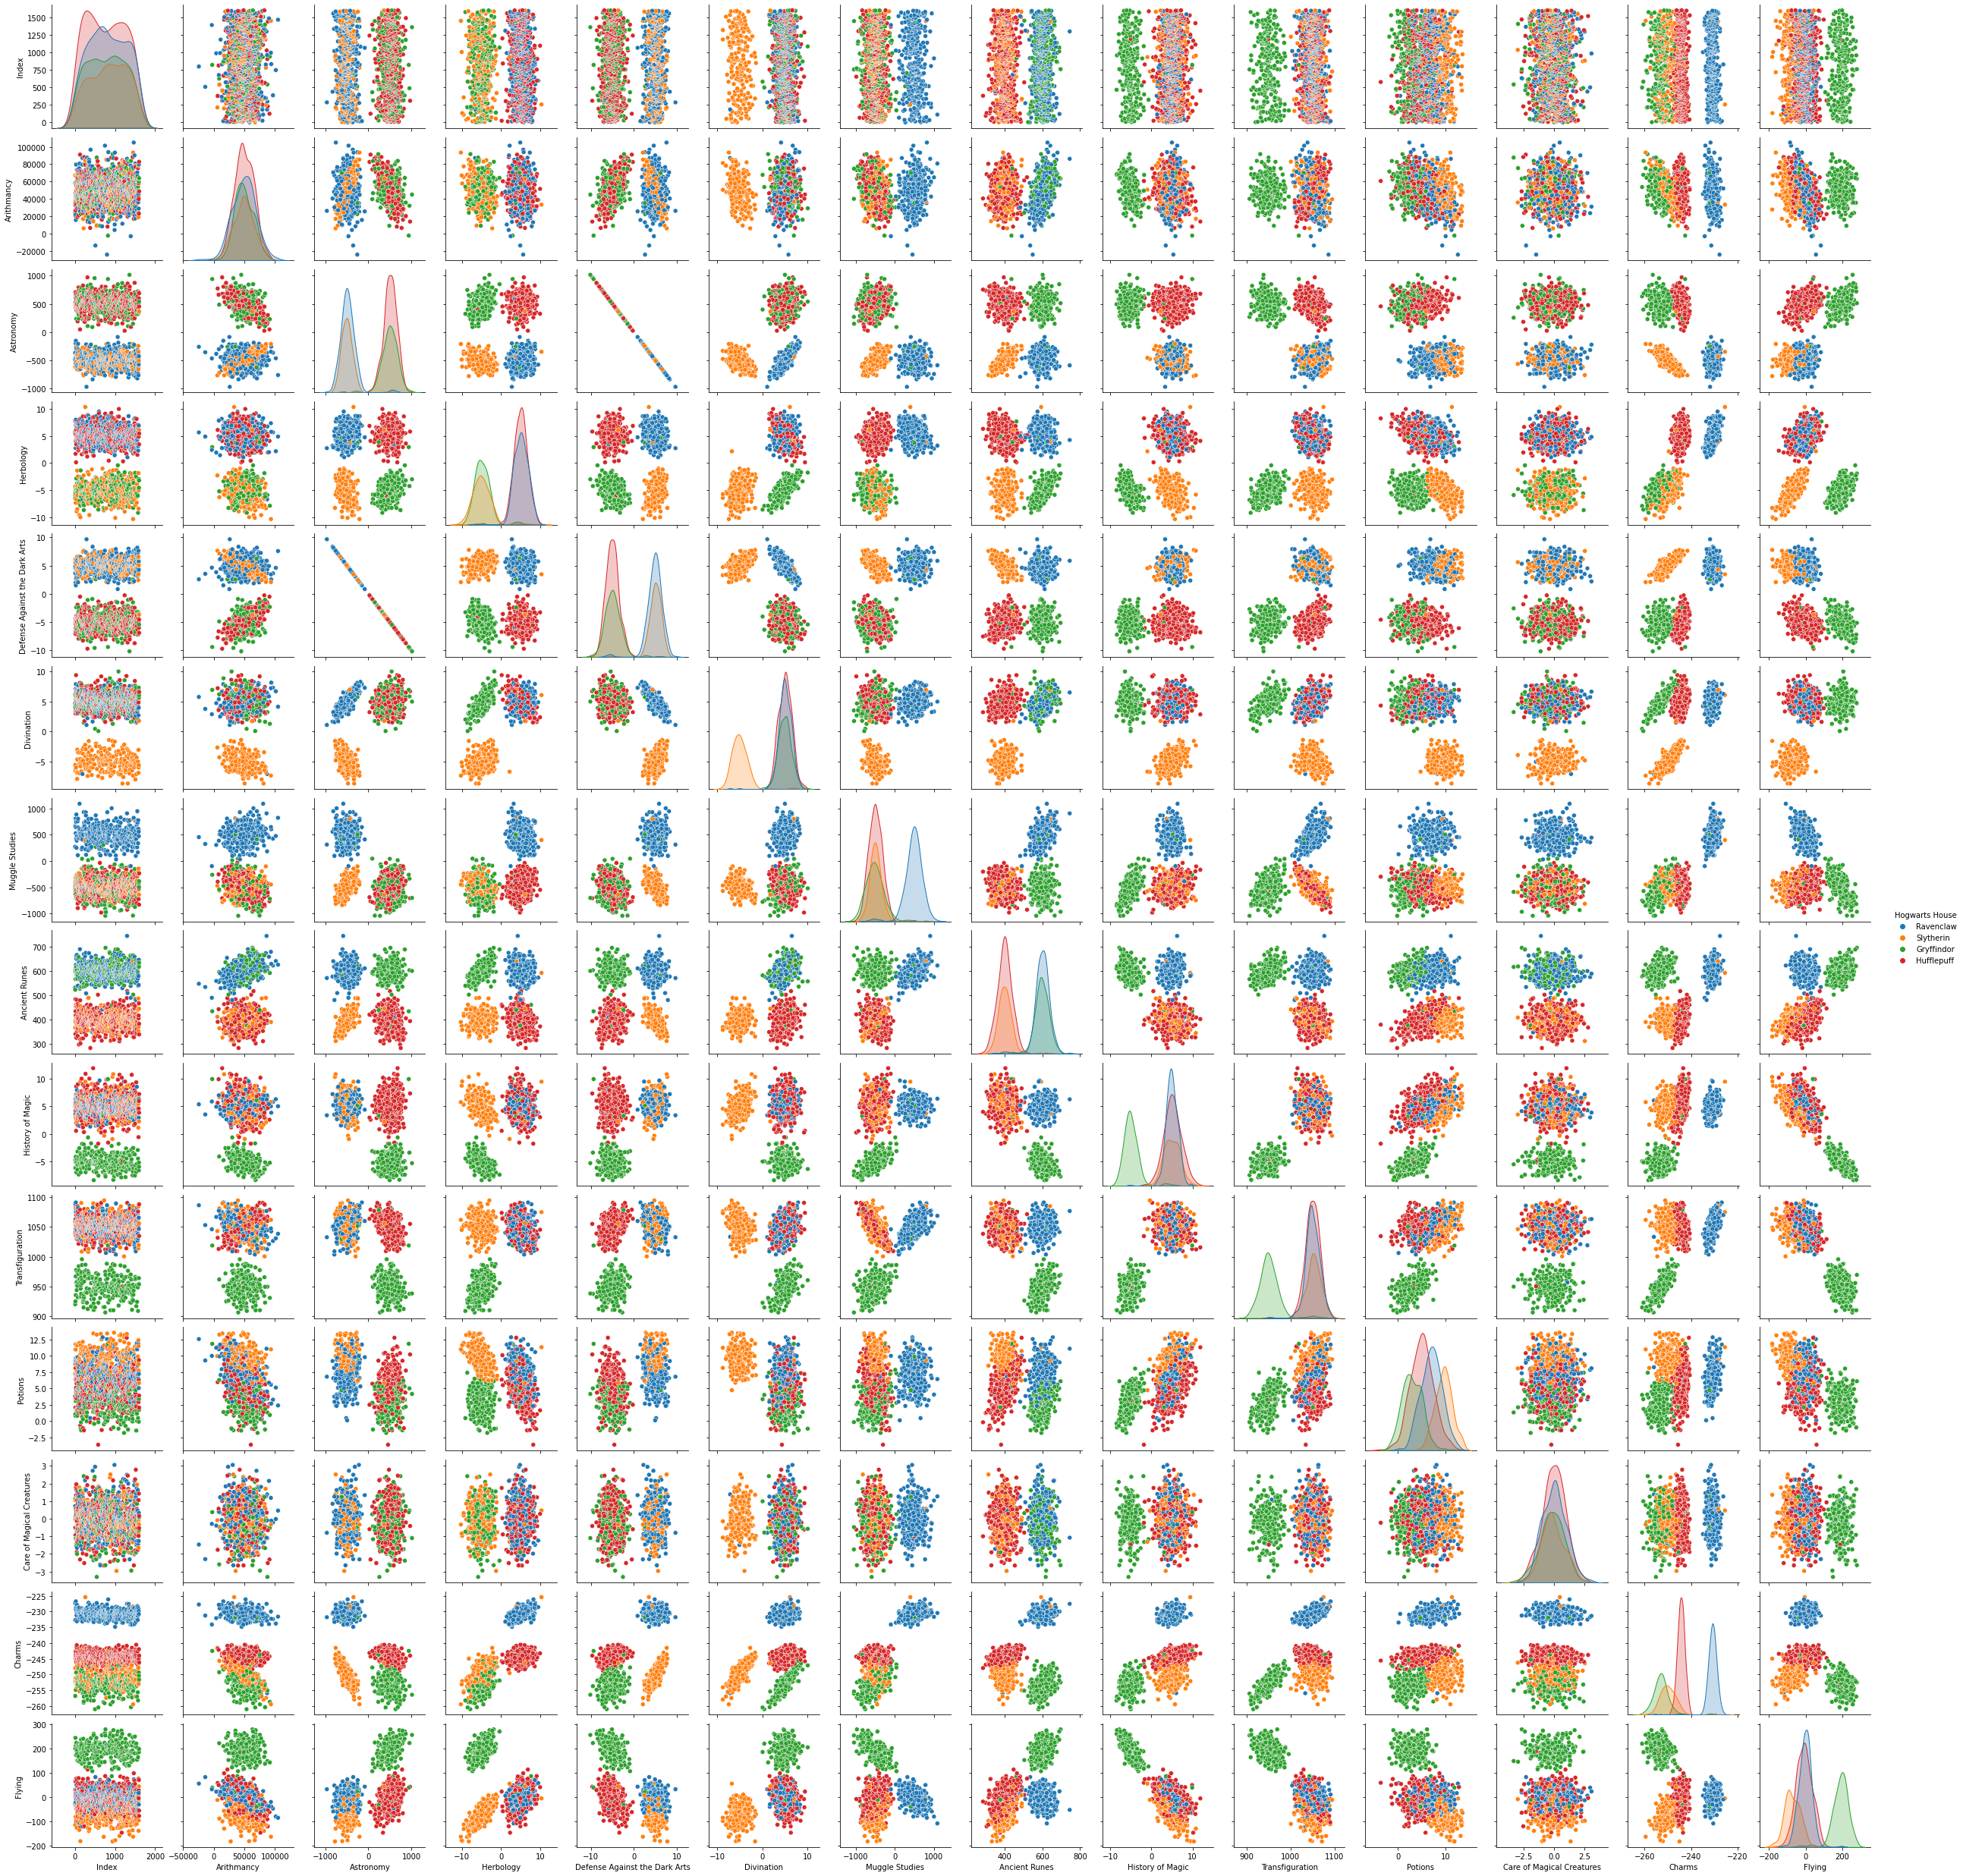

In [30]:
plt.figure(figsize=(10, 10))
sns.pairplot(df, hue=target_col)